## Steps followed:

1. Loaded the preprocessed data
2. Split data into Train & Test (test_split = 0.33)
3. Performed Bag of Words Vectorization of text data ("essay" text data)
4. Performed one-hot encoding of all categorical features
5. Performed normalization of numerical features using MinMaxScaler
6. Stacked up all the features using hstack()
7. Applied Multinomial Naive Bayes (sklearn.naive_bayes.MultinomialNB)
8. Hyperparameter tuning - Plotted training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot
9. Found the best hyperparameter 'alpha' and fit the model. 
10. Plotted ROC-AUC curve (as measure of performance)
11. Plotted confusion matrix based on the best threshold value from ROC-AUC
12. Print the top 20 features associated with the positive and negative classes each
13. Summarized your observations in terms of optimal hyperparameter, train AUC and test AUC scores using prettytables


## 1. Loading Preprocessed Data

In [4]:
import pandas as pd

data = pd.read_csv('preprocessed_data.csv')
data.columns.values

array(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price'], dtype=object)

## 2. Splitting data into Train and Test

In [5]:
# Split into X & y
X = data.drop(['project_is_approved'], axis=1)
y = data['project_is_approved'].values

# X.head()

# Split data in Train & Test since we will use GridSearch CV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
# Stratify parameter makes sure we split data in same proportion as our original data as per y i.e. labels

print("Before vectorization:\n")
print("X_Train shape: ",X_train.shape)
print("X_Test shape: ",X_test.shape)
print("y_Train shape: ",y_train.shape)
print("y_Test shape: ",y_test.shape)

Before vectorization:

X_Train shape:  (73196, 8)
X_Test shape:  (36052, 8)
y_Train shape:  (73196,)
y_Test shape:  (36052,)


## 3. Vectorizing "essay" text data

In [6]:
# Applying BoW (CountVectorizer) on essay text data

from sklearn.feature_extraction.text import CountVectorizer
manual_features_list = [] # This is to store all feature names in the same order as we stack. This will help us to print actul feature names while analysing top features

# For essay
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000) # ngram_range basically takes consecutive words. In this case, it will take unigram, bigram, trigram & 4-gram words
vectorizer.fit(X_train['essay'].values) # build vocab

X_train_essay_bow = vectorizer.transform(X_train['essay'].values) # transform into vectors
X_test_essay_bow = vectorizer.transform(X_test['essay'].values) # transform into vectors

print("After vectorization:\n")
print("X_train_essay_bow shape: ",X_train_essay_bow.shape)
print("X_test_essay_bow shape: ",X_test_essay_bow.shape)

print("="*100)
print(vectorizer.vocabulary_)

manual_features_list.extend(vectorizer.get_feature_names()) # adding feature names in our list

After vectorization:

X_train_essay_bow shape:  (73196, 5000)
X_test_essay_bow shape:  (36052, 5000)
{'how': 1973, 'happen': 1840, 'question': 3373, 'often': 3002, 'heard': 1866, 'classroom': 682, 'my': 2781, 'second': 3695, 'grade': 1764, 'filled': 1539, 'inquisitive': 2085, 'students': 4001, 'love': 2480, 'experience': 1442, 'learning': 2308, 'math': 2638, 'particular': 3113, 'favorite': 1512, 'group': 1806, 'instruction': 2100, 'small': 3822, 'groups': 1815, 'priority': 3283, 'community': 826, 'families': 1502, 'come': 770, 'many': 2585, 'different': 1083, 'countries': 931, 'twenty': 4632, 'five': 1572, 'languages': 2226, 'spoken': 3910, 'there': 4447, 'within': 4868, 'school': 3591, 'create': 943, 'environment': 1353, 'succeed': 4282, 'this': 4524, 'project': 3308, 'another': 274, 'way': 4768, 'support': 4302, 'daily': 990, 'engagement': 1310, 'growth': 1821, 'achievement': 145, 'these': 4451, 'chromebooks': 651, 'used': 4679, 'allow': 207, 'meet': 2678, 'individual': 2066, 'goals'

C:\Users\ParikshitShinge\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 4. One-hot encoding of all categorical features

In [8]:
# Apply One-Hot Encoding on the categorical features either using CountVectorizer(binary=True)

vectorizer = CountVectorizer(binary = True)

# teacher_prefix
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_teacherprefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacherprefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
print("After One Hot Encoding of teacher_prefix:\n")
print("X_train shape: ",X_train_teacherprefix_ohe.shape)
print("X_test shape: ",X_test_teacherprefix_ohe.shape)
print(vectorizer.get_feature_names_out())
manual_features_list.extend(vectorizer.get_feature_names())

# project_grade_category
vectorizer.fit(X_train['project_grade_category'].values)
X_train_projectgradecategory_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_projectgradecategory_ohe = vectorizer.transform(X_test['project_grade_category'].values)
print("="*100)
print("After One Hot Encoding of project_grade:\n")
print("X_train shape: ",X_train_projectgradecategory_ohe.shape)
print("X_test shape: ",X_test_projectgradecategory_ohe.shape)
print(vectorizer.get_feature_names_out())
manual_features_list.extend(vectorizer.get_feature_names())

# school_state
vectorizer.fit(X_train['school_state'].values)
X_train_schoolstate_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_schoolstate_ohe = vectorizer.transform(X_test['school_state'].values)
print("="*100)
print("After One Hot Encoding of school_state:\n")
print("X_train shape: ",X_train_schoolstate_ohe.shape)
print("X_test shape: ",X_test_schoolstate_ohe.shape)
print(vectorizer.get_feature_names_out())
manual_features_list.extend(vectorizer.get_feature_names())

# clean_categories
vectorizer.fit(X_train['clean_categories'].values)
X_train_cleancategories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_cleancategories_ohe = vectorizer.transform(X_test['clean_categories'].values)
print("="*100)
print("After One Hot Encoding of clean_categories:\n")
print("X_train shape: ",X_train_cleancategories_ohe.shape)
print("X_test shape: ",X_test_cleancategories_ohe.shape)
print(vectorizer.get_feature_names_out())
manual_features_list.extend(vectorizer.get_feature_names())

# clean_subcategories
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_cleansubcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_cleansubcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print("="*100)
print("After One Hot Encoding of clean_subcategories:\n")
print("X_train shape: ",X_train_cleansubcategories_ohe.shape)
print("X_test shape: ",X_test_cleansubcategories_ohe.shape)
print(vectorizer.get_feature_names_out())
manual_features_list.extend(vectorizer.get_feature_names())


After One Hot Encoding of teacher_prefix:

X_train shape:  (73196, 5)
X_test shape:  (36052, 5)
['dr' 'mr' 'mrs' 'ms' 'teacher']
After One Hot Encoding of project_grade:

X_train shape:  (73196, 4)
X_test shape:  (36052, 4)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']
After One Hot Encoding of school_state:

X_train shape:  (73196, 51)
X_test shape:  (36052, 51)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']
After One Hot Encoding of clean_categories:

X_train shape:  (73196, 9)
X_test shape:  (36052, 9)
['appliedlearning' 'care_hunger' 'health_sports' 'history_civics'
 'literacy_language' 'math_science' 'music_arts' 'specialneeds' 'warmth']
After One Hot Encoding of clean_subcategories:

X_train shape:  (73196, 30)
X_test shape:  (36052, 30)
['appliedsciences' 'c

## 5. Normalizing numerical features

In [9]:
# Apply Normalization on the numerical features using MinMaxScaler().


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# price
scaler.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = scaler.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = scaler.transform(X_test['price'].values.reshape(-1,1))
print("After Normalizing of price:\n")
print("X_train shape: ",X_train_price_norm.shape)
print("X_test shape: ",X_test_price_norm.shape)
manual_features_list.append('price')

# teacher_number_of_previously_posted_projects
scaler = MinMaxScaler()
scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_numofproj_norm = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_numofproj_norm = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("="*100)
print("After Normalizing of number of previous projects:\n")
print("X_train shape: ",X_train_numofproj_norm.shape)
print("X_test shape: ",X_test_numofproj_norm.shape)
manual_features_list.append('teacher_num_previous_projects')


After Normalizing of price:

X_train shape:  (73196, 1)
X_test shape:  (36052, 1)
After Normalizing of number of previous projects:

X_train shape:  (73196, 1)
X_test shape:  (36052, 1)


## 6. Stack up all features using hstack()

In [11]:
# Stack up the features using hstack

from scipy.sparse import hstack

X_tr_bow = hstack((X_train_essay_bow, X_train_teacherprefix_ohe, X_train_projectgradecategory_ohe, X_train_schoolstate_ohe, X_train_cleancategories_ohe, X_train_cleansubcategories_ohe, X_train_price_norm, X_train_numofproj_norm)).tocsr()
X_ts_bow = hstack((X_test_essay_bow, X_test_teacherprefix_ohe, X_test_projectgradecategory_ohe, X_test_schoolstate_ohe, X_test_cleancategories_ohe, X_test_cleansubcategories_ohe, X_test_price_norm, X_test_numofproj_norm)).tocsr()

print("Modelled data shape for BOW:")
print("X_train shape: ",X_tr_bow.shape)
print("X_test shape: ",X_ts_bow.shape)


Modelled data shape for BOW:
X_train shape:  (73196, 5101)
X_test shape:  (36052, 5101)


## 7. Apply Multinomial Naive Bayes

## 8. Hyperparameter tuning 

In [12]:
# Hyperparameter Tuning
# Plot the training and the CV AUC scores, for different values of 'alpha'

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False) 
# fit_prior = False because we don't want to learn class prior probabilities since we are providing class_prior

parameter = {'alpha': (0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100)}
clf = GridSearchCV(mnb, parameter, return_train_score=True, scoring='roc_auc', cv=10)

clf.fit(X_tr_bow, y_train)
#clf.cv_results_

GridSearchCV(cv=10,
             estimator=MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False),
             param_grid={'alpha': (1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100)},
             return_train_score=True, scoring='roc_auc')

Best Alpha BOW:  1e-05
Best Score BOW :  0.6905795849531093


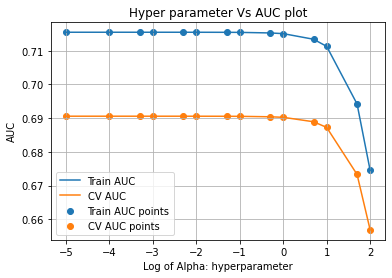

{1e-05: -5.0, 0.0001: -4.0, 0.0005: -3.3010299956639813, 0.001: -3.0, 0.005: -2.3010299956639813, 0.01: -2.0, 0.05: -1.3010299956639813, 0.1: -1.0, 0.5: -0.3010299956639812, 1: 0.0, 5: 0.6989700043360189, 10: 1.0, 50: 1.6989700043360187, 100: 2.0}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.075303      0.006486         0.007782        0.000747     0.00001   
2        0.071997      0.002359         0.007381        0.000489      0.0001   
1        0.073013      0.003703         0.007390        0.000482      0.0005   
4        0.070813      0.000446         0.007181        0.000399       0.001   
3        0.071414      0.001839         0.007481        0.000498       0.005   
6        0.072629      0.003567         0.007781        0.000400        0.01   
5        0.071716      0.000538         0.007381        0.000488        0.05   
7        0.071444      0.000625         0.007383        0.000486         0.1   
8        0.072227      0.002564 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Lets find out best alpha
best_alpha_bow = clf.best_params_['alpha']
best_score_bow = clf.best_score_

print('Best Alpha BOW: ', best_alpha_bow )
print('Best Score BOW : ', best_score_bow)

# Prep data for Hyperparamater Vs AUC graph
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alphas =  results['param_alpha']

# Since hyperparameter (alpha) is not uniformly scaled, take log for better graph representation
log_of_alphas = []

for alpha in alphas:
    alpha_log = np.log10(alpha)
    log_of_alphas.append(alpha_log)

log_of_alphas = pd.Series(log_of_alphas)
    
plt.plot(log_of_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_of_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_of_alphas, train_auc, label='Train AUC points')
plt.scatter(log_of_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log of Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
print("="*100)
print(dict(zip(alphas, log_of_alphas))) # For easier understanding of alpha to log-alpha
print("="*100)
print(results) # To check the exact values of AUC for each alpha

## 9. Fing the best alpha and fit the model

In [17]:
# From above curve, it seems like our best alpha lies between 1 & 10 because thats where the AUCs converge
# Lets take best_alpha as 5

best_alpha = 5

from sklearn.metrics import roc_curve, auc

mnb = MultinomialNB(alpha=best_alpha, class_prior=[0.5, 0.5], fit_prior=False) 
# fit_prior = False because we don't want to learn class prior probabilities since we are providing class_prior
mnb.fit(X_tr_bow, y_train)

y_tr_bow_pred = mnb.predict_proba(X_tr_bow)[:,1]
y_ts_bow_pred = mnb.predict_proba(X_ts_bow)[:,1]

print("Train score: ",mnb.score(X_tr_bow, y_train)*100, "%")
print("Test score: ",mnb.score(X_ts_bow, y_test)*100, "%")

Train score:  65.55003005628723 %
Test score:  64.83412848108287 %


## 10. Plot ROC AUC

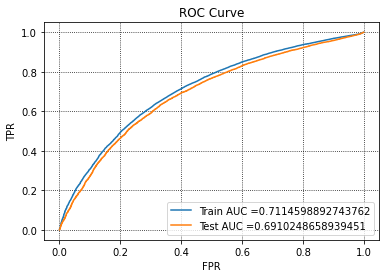

In [18]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_bow_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_ts_bow_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid(b=True, which='major', color='k', linestyle=':')
plt.show()


## 11. Plot confusion matrix

The maximum value of tpr*(1-fpr)  0.43671937525001053  for threshold  0.565


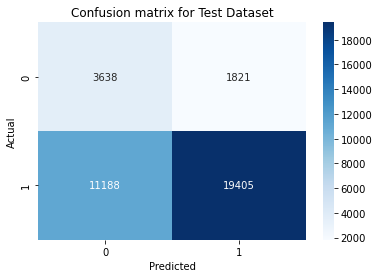

In [19]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate
from sklearn.metrics import confusion_matrix
import numpy as np

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr) ", max(tpr*(1-fpr)), " for threshold ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

#cm_train = np.array(confusion_matrix(y_train, predict_with_best_t(y_tr_bow_pred, best_t)))
cm_test = np.array(confusion_matrix(y_test, predict_with_best_t(y_ts_bow_pred, best_t)))

# Code from: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for Test Dataset")
plt.show()

## 12. Show top 20 features

In [20]:
#Print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)

# https://stackoverflow.com/questions/7271385/how-do-i-combine-two-lists-into-a-dictionary-in-python
# https://stackoverflow.com/questions/7971618/return-first-n-keyvalue-pairs-from-dict

positive_features = dict(zip(manual_features_list,list(mnb.feature_log_prob_[1])))
positive_features = list({k: v for k, v in sorted(positive_features.items(), key=lambda item: item[1], reverse=True)}.keys())[:20]
negative_features = dict(zip(manual_features_list,list(mnb.feature_log_prob_[0])))
negative_features = list({k: v for k, v in sorted(negative_features.items(), key=lambda item: item[1])}.keys())[:20]

print("Top 20 features associated with postive class: \n", positive_features)
print("="*100)
print("Top 20 features associated with negative class: \n", negative_features)



Top 20 features associated with postive class: 
 ['students', 'school', 'my', 'learning', 'classroom', 'the', 'they', 'not', 'my students', 'learn', 'help', 'many', 'nannan', 'we', 'need', 'reading', 'work', 'use', 'love', 'day']
Top 20 features associated with negative class: 
 ['dr', 'vt', 'wy', 'nd', 'stools allow', 'these stools', 'the wobble', 'chromebooks allow', 'chairs help', 'reluctant readers', 'chairs allow', 'chromebooks would', 'graphing', 'subscription', 'these chairs', 'de', 'core muscles', 'sturdy', 'these chromebooks', 'allow students move']


## 13. Summary

In [21]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Hyper Parameter", "Train AUC", "Test AUC"]
x.add_row(["BOW", 5, 0.7114, 0.6910])
print(x)

+------------+-----------------+-----------+----------+
| Vectorizer | Hyper Parameter | Train AUC | Test AUC |
+------------+-----------------+-----------+----------+
|    BOW     |        5        |   0.7114  |  0.691   |
+------------+-----------------+-----------+----------+
